In [229]:
import processing
import modeling
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

%matplotlib inline
%config InlineBackend.figure_format = 'svg'
sns.set_style('darkgrid')
random.seed(seed=43)
reload(processing)
import numpy as np
import functions as f
from sklearn import metrics


In [219]:
import_cols = ['id', 'year', 'age',
               'sex', 'race', 'region', 'educ', 'relig','news']
# reader = pd.read_stata(f.data_loc('GSS7212_R2.DTA'), iterator=True, chunksize=1)
# gssFCols = reader.get_chunk(1)

gss = f.load_dta(f.data_loc('GSS7212_R2.DTA'), columns=import_cols, chunksize=None)
gss = gss[gss.year>1995]
prej = pd.read_csv("composites/genderVar.csv")
gss = gss.merge(prej, 'left', on=["year","id"])

# change age to number (89+ just coded as 89)
gss.age = gss.age.astype('category').cat.codes + 18
age_mean = gss.age.mean()
# gss.age = gss.age.fillna(age_mean)
# gss.age = (gss.age - gss.age.mean())/gss.age.std()


# state_info = pd.read_csv('data/gssstate7304.csv')
# gss = pd.merge(gss, state_info, on=["id", "year"])
# gss.fipsstat = gss.fipsstat.astype('category')

# gss = gss.drop(['race', 'region', 'relig'], axis=1)


Loaded 57061 rows...
Done!


# Independent measures and gender composite (with bootstrap CIs)

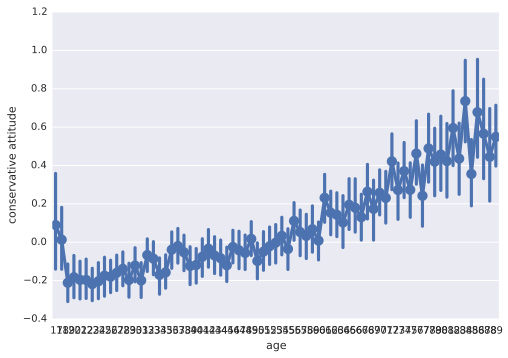

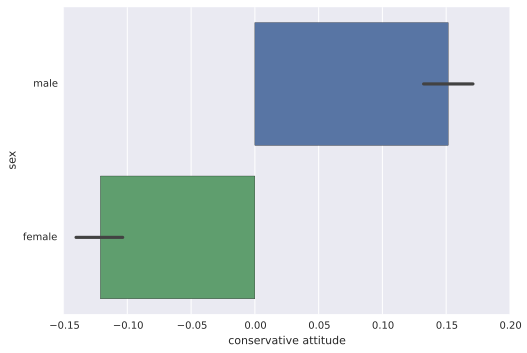

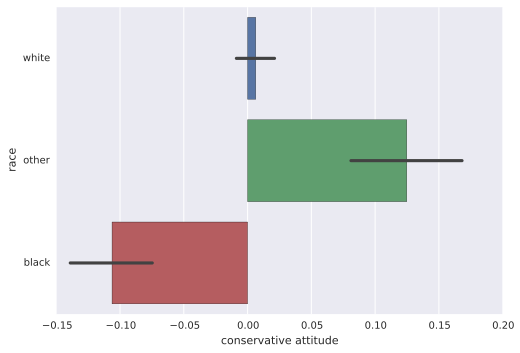

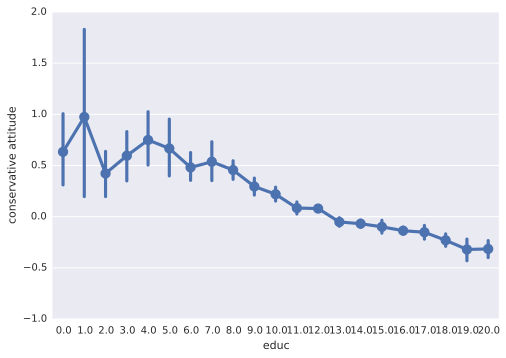

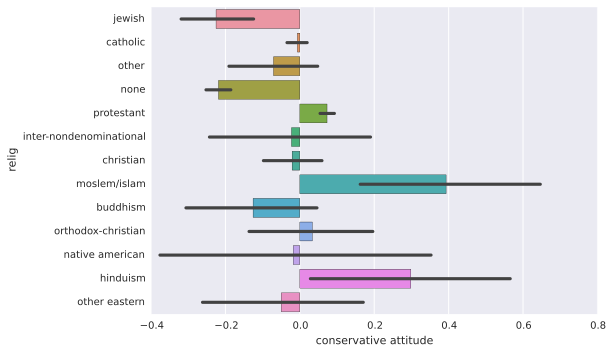

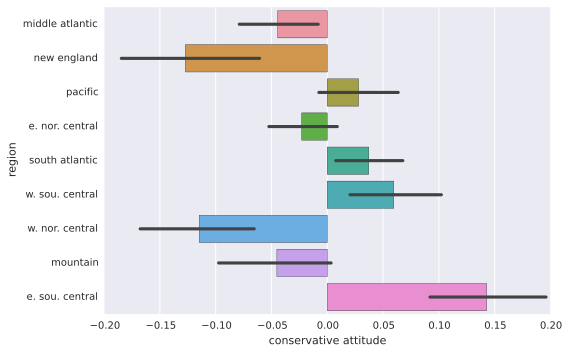

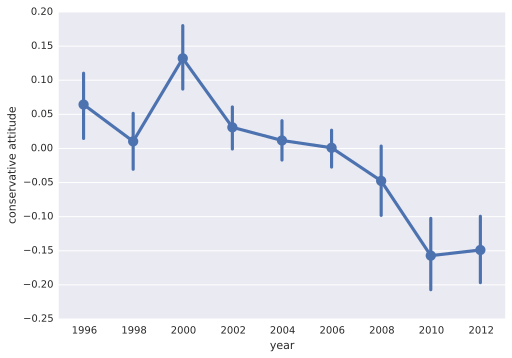

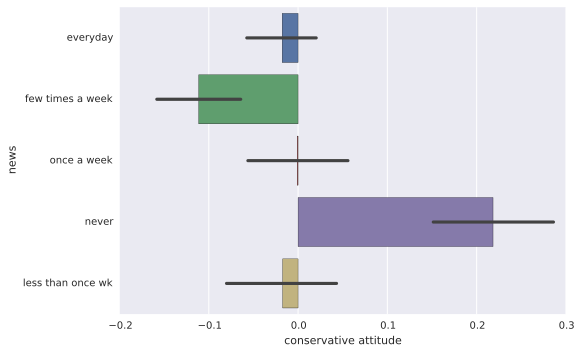

In [220]:
relevantCols = ['age',
               'sex', 'race', 'educ', 'relig','region','year','news']
sns.set_style('darkgrid')

for col in  relevantCols:
    grouped = gss.groupby(col).agg([np.mean,np.std])
    
    if gss[col].dtype.name in ['object','category']:
#         sns.barplot(grouped.genderValue['mean'],grouped.index,orient='h',ci=grouped.genderValue['std'])
        sns.barplot(y=col, x="genderValue",data=gss, orient = 'h')
        plt.ylabel(col)
        plt.xlabel('conservative attitude')
    else:
#         plt.plot(grouped.index,grouped.genderValue['mean'])
        sns.pointplot(x=col, y="genderValue", data=gss,marker='')
        plt.xlabel(col)
        plt.ylabel('conservative attitude')
    plt.show()

# Some correlations.. (possibly more interesting once interaction terms are added)

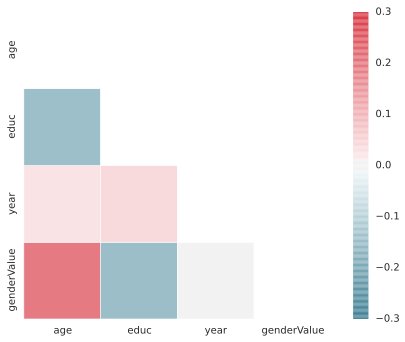

In [217]:
relevantCols = ['age', 'educ', 'year','genderValue']
sns.set(style="white")

# Compute the correlation matrix
corr = gss[relevantCols].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
# f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
# cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True, 
            linewidths=.5)

In [163]:

corr = gss[relevantCols].corr()
print corr

                  age      educ      year  genderValue
age          1.000000 -0.104514  0.058524     0.161868
educ        -0.104514  1.000000  0.019303    -0.163697
year         0.058524  0.019303  1.000000    -0.062222
genderValue  0.161868 -0.163697 -0.062222     1.000000


In [210]:
# gss.fipsstat = gss.fipsstat.astype('category')

gss['year'].values

array([1996, 1996, 1996, ..., 2012, 2012, 2012], dtype=int16)

In [223]:
gss = processing.preprocess_gss()

court = processing.preprocess_court_data()

data, y_col, x_cols = processing.process_combined_data(gss, court, 'genderValue')


Loaded 57061 rows...
Done!
Loaded 153 rows...
Done!


In [245]:
data.columns

sns.set(style="white")

# Compute the correlation matrix
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
# f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
# cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True, 
            linewidths=.5)

KeyboardInterrupt: 

train R^2
0.109355212989
test R^2
0.0911613560059


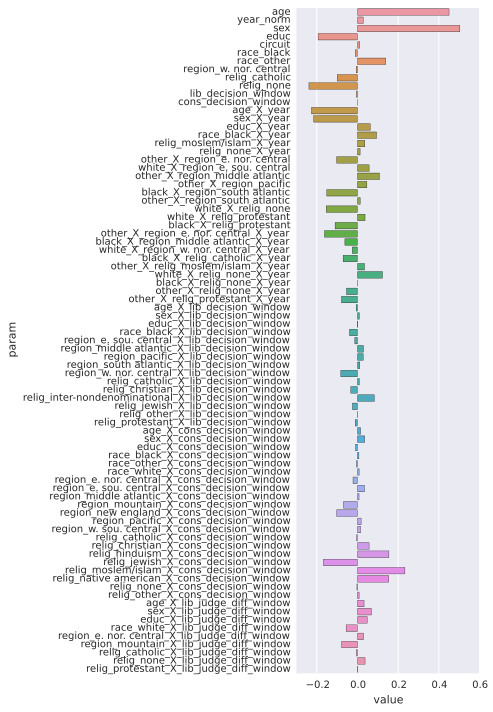

In [231]:

train, test = modeling.split_train_test(data)

model = modeling.fit_model(train, test, y_col, x_cols)

modeling.plot_fit(data, model, x_cols)


In [234]:
metrics.mutual_info_score(gss.year_norm,gss.genderValue)

2.8425475193420655

In [244]:
miMat = np.zeros(gss.shape[1])

for col in gss.columns:
    print col

id
year
age
year_norm
sex
educ
state
fipsstat
circuit
race_black
race_other
race_white
region_e. nor. central
region_e. sou. central
region_middle atlantic
region_mountain
region_new england
region_pacific
region_south atlantic
region_w. nor. central
region_w. sou. central
relig_buddhism
relig_catholic
relig_christian
relig_hinduism
relig_inter-nondenominational
relig_jewish
relig_moslem/islam
relig_native american
relig_none
relig_orthodox-christian
relig_other
relig_other eastern
relig_protestant
genderValue


In [238]:
gss.shape[1]

35

In [245]:
data.columns

Index([u'index', u'id', u'year', u'age', u'year_norm', u'sex', u'educ',
       u'state', u'fipsstat', u'circuit',
       ...
       u'relig_hinduism_X_lib_judge_diff_window',
       u'relig_inter-nondenominational_X_lib_judge_diff_window',
       u'relig_jewish_X_lib_judge_diff_window',
       u'relig_moslem/islam_X_lib_judge_diff_window',
       u'relig_native american_X_lib_judge_diff_window',
       u'relig_none_X_lib_judge_diff_window',
       u'relig_orthodox-christian_X_lib_judge_diff_window',
       u'relig_other_X_lib_judge_diff_window',
       u'relig_other eastern_X_lib_judge_diff_window',
       u'relig_protestant_X_lib_judge_diff_window'],
      dtype='object', length=283)

In [284]:
i_cols = data.ix[:,x_cols].columns

corr = data[i_cols.values].corr()
np.sum(np.sum(np.abs(corr)>.6,axis=0)>1)

248

In [285]:
i_cols.values

array(['age', 'year_norm', 'sex', 'educ', 'circuit', 'race_black',
       'race_other', 'race_white', 'region_e. nor. central',
       'region_e. sou. central', 'region_middle atlantic',
       'region_mountain', 'region_new england', 'region_pacific',
       'region_south atlantic', 'region_w. nor. central',
       'region_w. sou. central', 'relig_buddhism', 'relig_catholic',
       'relig_christian', 'relig_hinduism',
       'relig_inter-nondenominational', 'relig_jewish',
       'relig_moslem/islam', 'relig_native american', 'relig_none',
       'relig_orthodox-christian', 'relig_other', 'relig_other eastern',
       'relig_protestant', 'lib_decision_window', 'cons_decision_window',
       'lib_judge_diff_window', 'age_X_year', 'sex_X_year', 'educ_X_year',
       'race_black_X_year', 'race_other_X_year', 'race_white_X_year',
       'region_e. nor. central_X_year', 'region_e. sou. central_X_year',
       'region_middle atlantic_X_year', 'region_mountain_X_year',
       'region_new en